# Taller Análisis Exploratio - PetFinder
+ __Student 1:__ Gabriel Suarez Barón
+ __Student 2:__ Alejandro Varela Franco
+ __Student 3:__ Santiago Arévalo Valencia
+ __Student 4:__ Samuel Hernández

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/train.csv')

<b>1. ¿Cuantos registros y variables cuenta el dataset?</b>


In [58]:
print("Numero de filas: ", df.shape[0])
print("Numero de columnas: ", df.shape[1])

Numero de filas:  14993
Numero de columnas:  24


<b>2. ¿Cómo están los valores de la variable Age?</b>

        2.1 ¿Cuál es la distribución por tipo de animal
        2.2 Cuales son los estadísticos descriptivos para esta variable.

En este caso la variable "Age" esta en meses

       count       mean        std  min  25%  50%   75%    max
Type                                                          
1     8132.0  12.906173  21.377588  0.0  2.0  3.0  12.0  255.0
2     6861.0   7.543361  12.771554  0.0  2.0  3.0   8.0  212.0


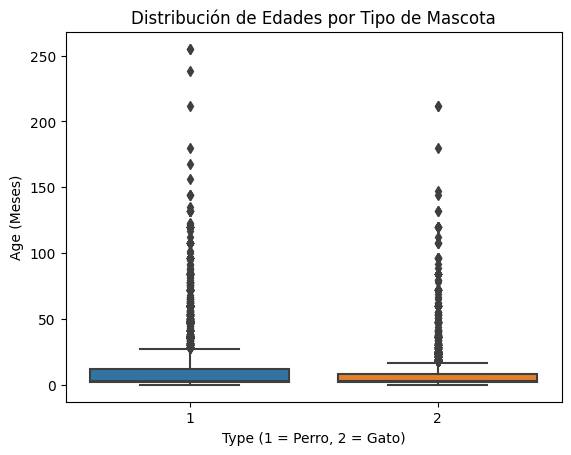

In [59]:
print(df.groupby('Type')['Age'].describe())
sns.boxplot(x="Type", y="Age", data=df)

plt.xlabel('Type (1 = Perro, 2 = Gato)')
plt.ylabel('Age (Meses)')
plt.title('Distribución de Edades por Tipo de Mascota')

plt.show()

A continuación vamos a ver esta información más especifica, transformeros la edad de meses a años

En este caso, veremos el gráfico de tipo de animal por cada edad presente en el DataSet

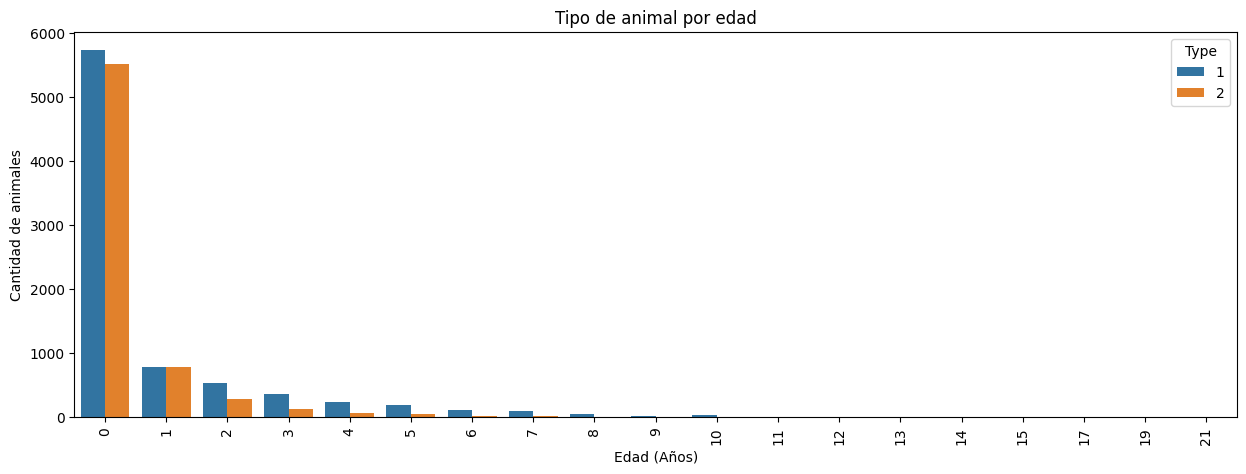

In [60]:
df["AgeYear"] = df["Age"].apply(lambda x: x//12)

plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Tipo de animal por edad")


sns.countplot(x="AgeYear", data=df, hue="Type")
plt.xlabel("Edad (Años)")
plt.ylabel("Cantidad de animales")

plt.show()

Debido a que hay edades con mucha cantidad de datos, vamos a ver más a fondo las edades con menor cantidad de registros, en este caso tomaremos desde los 6 años hasta los 21 años

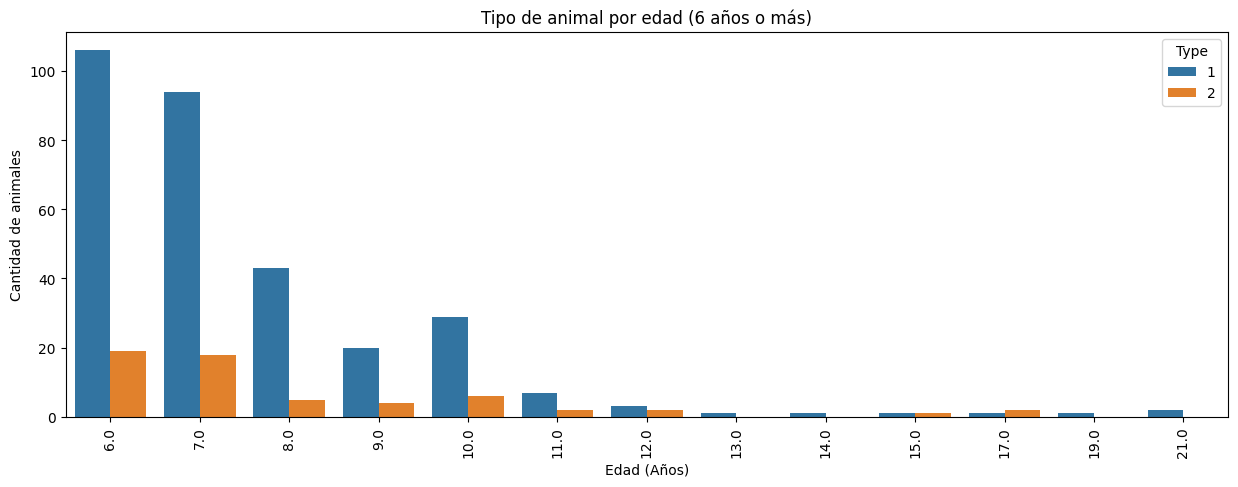

In [61]:
df["isAdult"] = np.where(df["AgeYear"] > 5, df["AgeYear"], 0)
df["isAdult"] = df["isAdult"].replace(0, np.nan)

plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Tipo de animal por edad (6 años o más)")

sns.countplot(x="isAdult", data=df, hue="Type")
plt.xlabel("Edad (Años)")
plt.ylabel("Cantidad de animales")

plt.show()



Ahora veremos la estadistica descriptiva de la variable Age y la variabel AgeYear

In [62]:
age_stats = df['Age'].describe().to_frame().transpose()
age_year_stats = df['AgeYear'].describe().to_frame().transpose()

stats_df = pd.concat([age_stats, age_year_stats])

print(stats_df)

           count       mean       std  min  25%  50%   75%    max
Age      14993.0  10.452078  18.15579  0.0  2.0  3.0  12.0  255.0
AgeYear  14993.0   0.651637   1.55878  0.0  0.0  0.0   1.0   21.0


<b>3. ¿Hay más datos de perros o de gatos?</b>

In [63]:
animal_counts = df['Type'].value_counts()

print("Cantidad de registros para cada tipo de animal:")
print(animal_counts)

if animal_counts[1] > animal_counts[2]:
    print("Hay más datos de perros")
else:
    print("Hay más datos de gatos")

Cantidad de registros para cada tipo de animal:
1    8132
2    6861
Name: Type, dtype: int64
Hay más datos de perros


<b>4. ¿Cómo es la velocidad de adopción para perros y gatos?</b>

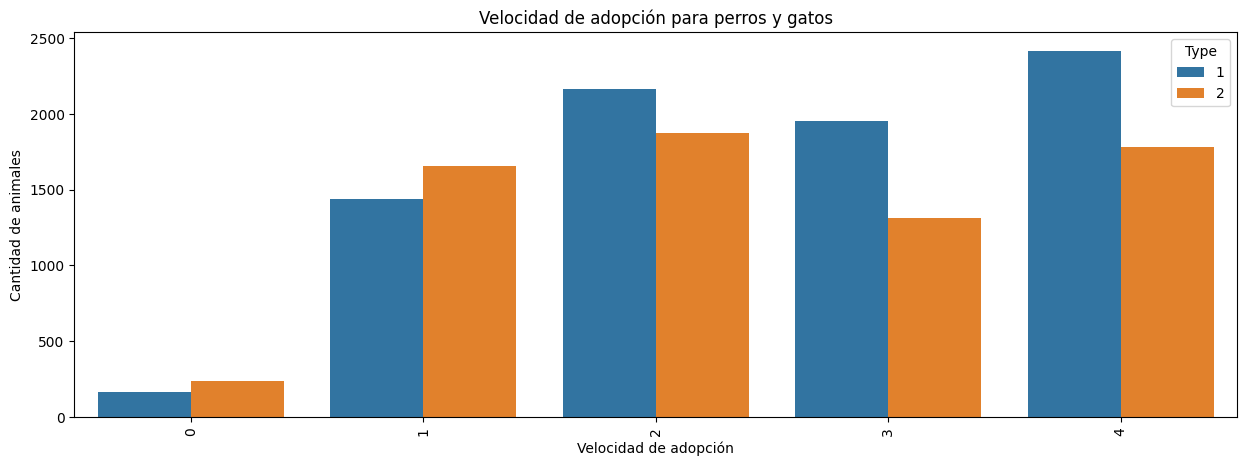

In [66]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)

sns.countplot(x="AdoptionSpeed", data=df, hue="Type")

plt.xlabel('Velocidad de adopción')
plt.ylabel('Cantidad de animales')
plt.title('Velocidad de adopción para perros y gatos')

plt.show()


<b>5. Encuentre los nombres sin valores.</b>

        5.1 ¿Cuántos para gatos y perros?
        5.2 ¿Eliminar o reemplazar los registros?, justifique

In [69]:
print("Perros con nombres nulos: ", df[df["Type"] == 1]["Name"].isna().sum())
print("Gatos con nombres nulos: ", df[df["Type"] == 2]["Name"].isna().sum())

Perros con nombres nulos:  649
Gatos con nombres nulos:  608


Decidimos reemplazar los registros, debido a que no sabemos si el nombre es una variable significativa para decidir si se adopta o no. Esto significa que un nombre nulo puede o no puede influir en la rapidez de adopción

<b>6. ¿la salud podría significar algo en la velocidad de adopción?</b>

In [71]:
health_stats = df.groupby('Health')['AdoptionSpeed'].describe()
print(health_stats)

          count      mean       std  min   25%  50%  75%  max
Health                                                       
1       14478.0  2.510499  1.175135  0.0  2.00  2.0  4.0  4.0
2         481.0  2.659044  1.233291  0.0  2.00  3.0  4.0  4.0
3          34.0  3.029412  1.058452  0.0  2.25  3.0  4.0  4.0


AdoptionSpeed    0     1     2     3     4    All
Health                                           
1              392  2999  3925  3150  4012  14478
2               17    89   106    98   171    481
3                1     2     6    11    14     34
All            410  3090  4037  3259  4197  14993


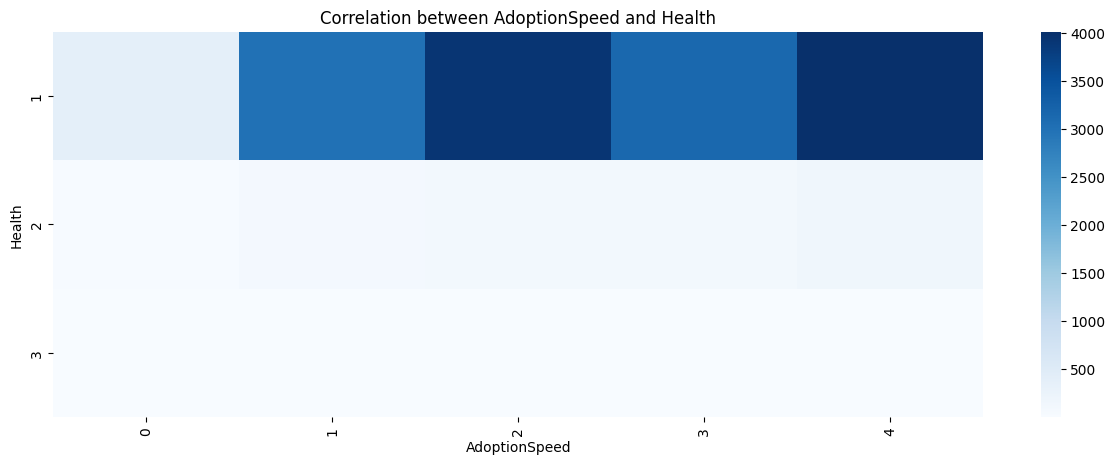

In [75]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Correlation between AdoptionSpeed and Health")

print(pd.crosstab(df["Health"], df["AdoptionSpeed"], margins=True))
sns.heatmap(pd.crosstab(df["Health"], df["AdoptionSpeed"]), cmap="Blues")
plt.show()

En general, podemos inferir que la salud de la mascota puede ser un factor importante en la velocidad de adopción, y que las personas pueden tener preferencias específicas en cuanto a la salud de la mascota que desean adoptar.

<b>7. ¿Cuales son los cinco nombres más populares para los perros?</b>

In [76]:
df_dogs = df[df['Type'] == 1]
name_counts = df_dogs['Name'].value_counts()

top_names = name_counts.head(5)

print("Los cinco nombres más populares para perros son:")
print(top_names)

Los cinco nombres más populares para perros son:
Lucky      48
Puppy      45
Brownie    44
Max        35
Baby       32
Name: Name, dtype: int64


<b>8. Revise la relación entre la variable de edad y la velocidad de adopción.</b>

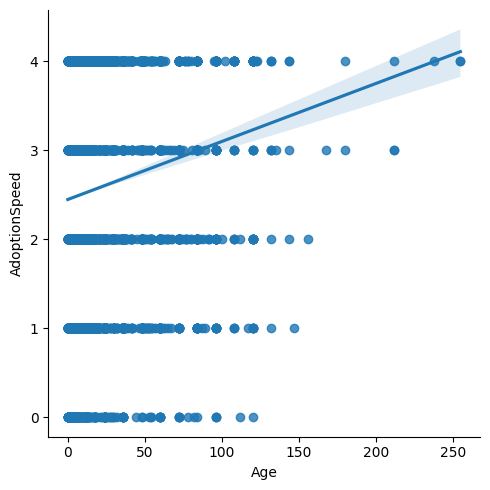

In [77]:
sns.lmplot(x='Age', y='AdoptionSpeed', data=df)
plt.show()

Si la línea de regresión es ascendente, esto sugiere que a medida que la edad aumenta, la velocidad de adopción disminuye, lo que significa que los animales más jóvenes son adoptados más rápidamente. Si la línea de regresión es descendente, esto sugiere que a medida que la edad aumenta, la velocidad de adopción aumenta, lo que significa que los animales más viejos son adoptados más rápidamente.

Sin embargo debido a que la variable velocidad es una variable categorica, un gráfico de dispersión no es el mejor gráfico para saber si existe una relación, ahora usaremos un grafico de cajas, el cual nos corroborá lo anterior


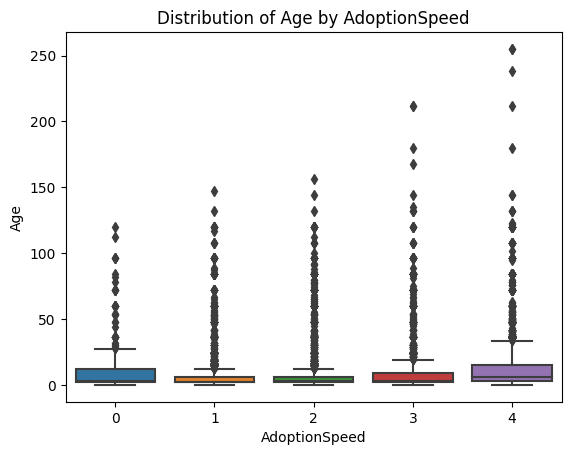

In [82]:
sns.boxplot(x="AdoptionSpeed", y="Age", data=df)
plt.title("Distribution of Age by AdoptionSpeed")
plt.xlabel("AdoptionSpeed")
plt.ylabel("Age")
plt.show()

<b>9. ¿Existe alguna relación entre la longitud del nombre y la velocidad de adopción?</b>

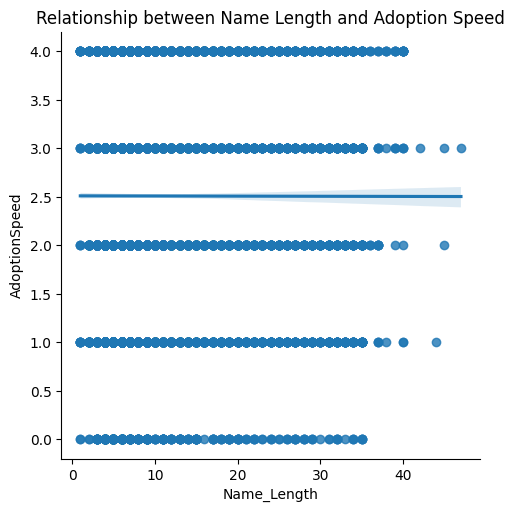

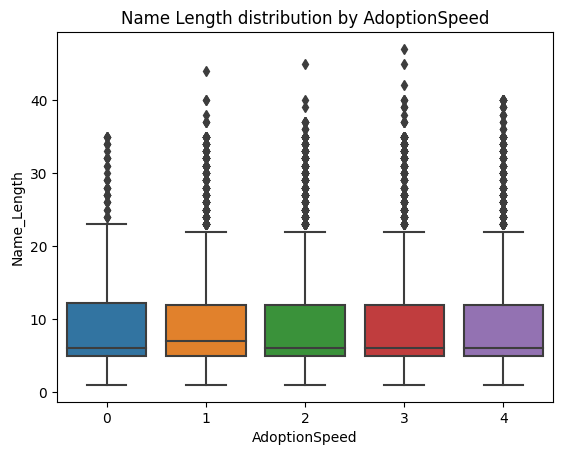

In [84]:
df["Name_Length"] = df["Name"].str.len()

# Diagrama de dispersión
sns.lmplot(x="Name_Length", y="AdoptionSpeed", data=df)
plt.title("Relationship between Name Length and Adoption Speed")
plt.show()

# Boxplot
sns.boxplot(x="AdoptionSpeed", y="Name_Length", data=df)
plt.title("Name Length distribution by AdoptionSpeed")
plt.show()

El diagrama de dispersión muestra una distribución uniforme de los puntos, lo que indica que no hay una relación clara entre la longitud del nombre y la velocidad de adopción.

Por otro lado, el boxplot muestra que la distribución de la longitud del nombre es similar para cada nivel de velocidad de adopción, lo que también sugiere que no hay una relación clara entre estas variables.

No podemos inferir que haya una relación entre la longitud del nombre y la velocidad de adopción.